In [1]:
import itertools
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
from gensim.corpora.dictionary import Dictionary

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Classifying fake news using supervised learning with NLP
### 1.1. Theory
#### What is supervised learning?
Supervised learning is a form of machine learning where you are given or create training data. This data has a label or outcome which you want the model or algorithm to learn.

One common problem used as a good example of introductory machine learning is the **Fischer's iris data**; we have a few example rows of it here. 

- The `data` has several features: `Sepal Length` and `width` and `Petal length` and `width`. 
- The `label` we want to learn and predict is the `species`. 

This is a classification problem, so you want to be able to classify or categorize some data based on what you already know or have learned. Our goal is to use the dataset to make intelligent hypotheses about the species based on the geometric features.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = [iris.target_names[k] for k in range(3) for _ in range(50)]
df.iloc[[0,51,101]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
51,6.4,3.2,4.5,1.5,versicolor
101,5.8,2.7,5.1,1.9,virginica


#### Supervised learning with NLP
But instead of using geometric features like the `Iris dataset`, we need to use language. 

To help create features and train a model, we will use [Scikit learn](https://scikit-learn.org/stable/), a powerful open-source library. 

One of the ways you can create supervised learning data from text is by using bag of words models or `TFIDF` as features.

#### IMDB Movie Dataset
Let's say I have a dataset full of movie plots and genres from the IMDB database, as shown in this chart. 

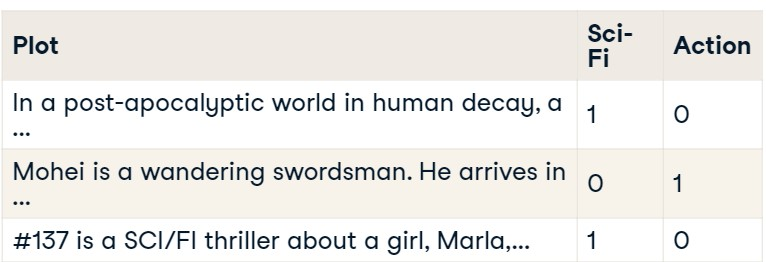

In [3]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

I've separated the action and `sci-fi` movies, removing any movies labeled both action and scifi. I want to predict whether a movie is action or `sci-fi` based on the `plot summary`. 

The dataset we've extracted has categorical features generated using some preprocessing. We can see the plot summary, and the `sci-fi` and `action` columns. You can also see the `Sci-Fi` column, which is `1` for movies that are `scifi` and `0` for movies that are `action`. The `Action` column is the inverse of the `Sci-Fi` column.

####  Supervised learning steps
In the next section, we'll use `scikit-learn` to predict a movie's genre from its plot. 

But first, let's review the **supervised learning** process as a whole. To begin, we collect and preprocess our data. 

Then, we determine a `label` - this is what we want the model to learn, in our case, the `genre` of the movie. 

We can split our data into training and testing datasets, keeping them separate so we can build our model using only the training data. The test data remains **unseen** so we can test how well our model performs after it is trained. This is an essential part of **Supervised Learning**! We also need to extract features from the text to predict the `label`. We will use a `bagof words` vectorizer built into `scikit-learn` to do so. After the model is trained, we can then test it using the test dataset. 

There are also other methods to evaluate model performance, such as `k-fold cross validation`.

### 1.2. PRACTICES
#### Exercise 1.2.1. Which possible features?
Which `features` is in a `text classification` problem?
#### Answers
- Number of words in a document.
- Specific named entities.
- Language.

#### Exercise 1.2.2. Training and testing
What datasets are needed for **`supervised learning`**?
#### Answers:
Both of training and testing dataset.

## 2. Building word count vectors with scikit-learn
### 2.1. Theory
#### Predicting movie genre
We have a dataset full of movie plots and what genre the movie is -- either `action` or `sci-fi`. We want to create `bag of words vectors` for these movie plots to see if we can predict the genre based on the words used in the plot summary.
#### Count Vectorizer with Python
To do so, we first need to import some necessary tools from `Sci-kit learn`. Once the data is loaded, we can create y which traditionally refers to the labels or outcome you want the model to learn. We can use the `Sci-Fi` column which has `1` if the movie is `Sci-Fi` and `0` if it is `Action`. Then, scikit learn's `train_test_split` function can be used to split the dataframe into training and testing data. 

This method will split the features which is the plot summary or column `PLOT` and the `labels (y)` based on a given test_size such as `0.33`, representing `33 percent`. I have also set random state so we have a repeatable result, it operates similar to setting a random seed and ensures I get the same results when I run the code again. 

The function will take `33%` of rows to be marked as test data, and remove them from the training data. The `test data` is later used to see what my model has learned. The resulting data from `train_test_split` are training data (as `X_train`) and training labels (as `y_train`) and testing data as `X_test` and testing labels as `y_test`. 

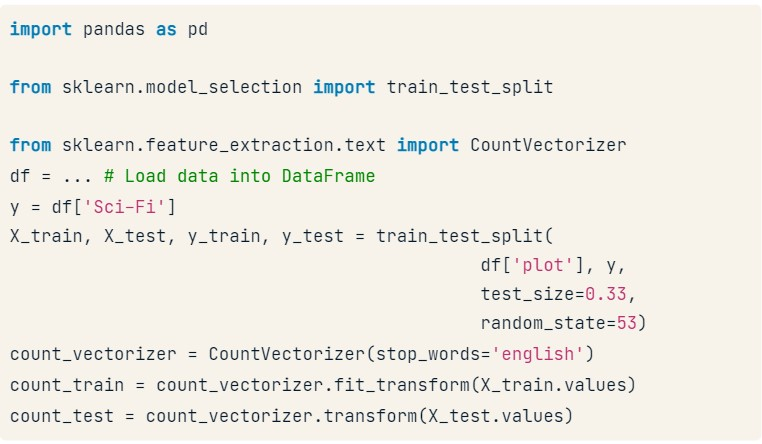

In [4]:
## Hình minh họa Image(fig1, height, width)

Next, we create a countvectorizer which turns my text into bag of words vectors similar to a `Gensim corpus`, it will also remove English stop words from the movie plot summaries as a preprocessing step. Each token now acts as a feature for the machine learning classification problem, just like the flower measurements in the `iris` data set. We can then call `fit_transform` on the training data to create the `bag-of-words vectors`. 

`Fit_transform` is a handy shortcut which will call the model's fit and then transform methods; which here generates a mapping of words with IDs and vectors representing how many times each word appears in the plot. `Fit_transform` operates differently for each model, but generally fit will find parameters or norms in the data and transform will apply the model's underlying algorithm or approximation -- similar to preprocessing but with a specific use case in mind. 

For the `CountVectorizer` class, `fit_transform` will create the bagofwords dictionary and vectors for each document using the training data. 

After calling `fit_transform` on the training data, we call transform on the test data to create bag of words vectors using the same dictionary. The training and test vectors need to use a consistent set of words, so the trained model can understand the test input. If we don't have much data, there can be an issue with words in the test set which don't appear in the training data. This will throw an error, so you will need to either add more training data or remove the unknown words from the test dataset. In only a few lines of `Python`, we have transformed text into `bagofwords vectors` and generated test and training datasets. `Scikitlearn` is a great aid in helping make `NLP` machine learning simple and accessible.

### 2.2. PRACTICES
#### Exercise 2.2.1. CountVectorizer for text classification
It's time to begin building your `text classifier`! 

The [data](https://www.kaggle.com/dovannhan/nlp-fig?select=fake_or_real_news.csv) has been loaded into a `DataFrame` called `df`. Explore it in the IPython Shell to investigate what columns you can use. The `.head()` method is particularly informative.

In [5]:
df = pd.read_csv(r'../input/nlp-fig/fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In this exercise, you'll use pandas alongside `scikit-learn` to create a sparse text vectorizer you can use to train and test a simple supervised model. To begin, you'll set up a CountVectorizer and investigate some of its features.
#### SOLUTION

In [6]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Print the head of df
print(df.head())

# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=33)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
['00', '000', '0000', '000000031', '000035', '00006', '000ft', '001', '0011', '003']


#### Exercise 2.2.2. TfidfVectorizer for text classification
Similar to the sparse `CountVectorizer` created in the previous exercise, you'll work on creating tf-idf vectors for your documents. You'll set up a `TfidfVectorizer` and investigate some of its features.

In this exercise, you'll use pandas and sklearn along with the same `X_train`, `y_train` and `X_test`, `y_test` `DataFrames` and `Series` you created in the last exercise.
#### SOLUTION.

In [7]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.8)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

# max value
print(tfidf_train.A[:5].max())

['00', '000', '0000', '000000031', '000035', '00006', '000ft', '001', '0011', '003']
[[0.         0.00871556 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
0.6197455236756307


#### Exercise 2.2.4. Inspecting the vectors
To get a better idea of how the vectors work, you'll investigate them by converting them into pandas DataFrames.

Here, you'll use the same data structures you created in the previous two exercises (`count_train`, `count_vectorizer`, `tfidf_train`, `tfidf_vectorizer`) as well as pandas, which is imported as `pd`.
#### SOLUTION.

In [8]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

   00  000  0000  000000031  000035  00006  000ft  001  0011  003  ...  تنجح  \
0   0    1     0          0       0      0      0    0     0    0  ...     0   
1   0    0     0          0       0      0      0    0     0    0  ...     0   
2   0    0     0          0       0      0      0    0     0    0  ...     0   
3   0    0     0          0       0      0      0    0     0    0  ...     0   
4   0    0     0          0       0      0      0    0     0    0  ...     0   

   حلب  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0   0   0   0        0   0    0        0      0  
1    0   0   0   0        0   0    0        0      0  
2    0   0   0   0        0   0    0        0      0  
3    0   0   0   0        0   0    0        0      0  
4    0   0   0   0        0   0    0        0      0  

[5 rows x 56819 columns]
    00       000  0000  000000031  000035  00006  000ft  001  0011  003  ...  \
0  0.0  0.008716   0.0        0.0     0.0    0.0    0.0  0.0   0.0  0.0  ...   
1  

## 3. Training and testing a classification model with scikit-learn
### 3.1. Theory
#### Naive Bayes classifier
A `Naive Bayes model` is commonly used for testing `NLP classification` problems because of its basis in probability. 

`Naive bayes algorithm` uses probability, attempting to answer the question if given a particular piece of data, how likely is a particular outcome? 

For example, thinking back to our movie genres dataset. If the plot has a spaceship, how likely is it that the movie is Sci-Fi? 

And given a Spaceship and an alien how likely NOW is it a sci-fi movie? Each word acts as a feature from our CountVectorizer helping classify our text using probability. Naive bayes has been used for text classification problems since the 1960s and continues to be used today despite the growth of many other models, algorithms and neural network architectures. 

That said, it is not always the best tool for the job, but it is a simple and effective one you will use to build a fake news classifier.

#### Naive Bayes with scikit-learn
We'll use scikit learn's naive bayes to take a look at our scifi versus action plot classification problem. Recall the data we're using is simply IMDB plot summaries, and whether the movie is science fiction or action. 
- First, we import the naive bayes model class, multinomial naive bayes, which works well with count vectorizers as it expects integer inputs. 

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

- MultinomialNB is also used for multiple label classification. 
- This model may not work as well with floats, such as tfidf weighted inputs. Instead, use support vector machines or even linear models; although I recommend trying Naive Bayes first to determine if it can also work well. We use the metrics module to evaluate model performance. 
- We initialize our class and call fit with the training data. If you recall from the previous theory, this will determine the internal parameters based on the dataset. We pass the training count vectorizer first and the training labels second. 

In [10]:
NB_classifier = MultinomialNB()
NB_classifier.fit(count_train, y_train)

MultinomialNB()

After fitting the model, we call predict with the count vectorizer test data. Predict will use the trained model to predict the label based on the test data vectors. We save the predicted labels in variable pred to test the accuracy. Finally, we test accuracy using accuracy_score from the metrics module and passing the predicted and test labels. 

Accuracy for our model means the percentage of correct genre guesses out of total guesses. Our model has about 88% accuracy -- which is pretty good for a first try! You'll be applying the Multinomial Naive Bayes classifier to the fake news dataset in the following exercises.

In [11]:
pred = NB_classifier.predict(count_test)
metrics.accuracy_score(pred, y_test)

0.8880918220946915

#### Confusion matrix
To further evaluate our model, we can also check the confusion matrix which shows correct and incorrect labels.

The `confusion_matrix` function from the metrics module takes the test labels, the predictions and a list of labels. If the label list is not passed, scikit learn will order them using Python ordering. The confusion matrix is a bit easier to read when we transform it into a table. 

In [12]:
metrics.confusion_matrix(y_test, pred, labels = ["FAKE", "REAL"])

array([[885, 154],
       [ 80, 972]])

- The first value and last value of the matrix (or the main diagonal of the matrix) show true scores, meaning, true classification of both action and scifi films based on the plot bag of words vectors. 
- In a confusion matrix, the predicted labels are shown across the top and the true labels are shown down the side. 

> This confusion matrix shows 80 Sci-Fi movies incorrectly labeled as Action and 154 Action movies incorrectly labeled as Sci-Fi. We can see from the distribution of true positives and negatives that our dataset is a bit skewed, we have many more action films than sci-fi. This could be one reason that our action movies are predicted more accurately.

### 3.2. PRACTICES
#### Exercise 3.2.1. Training and testing the "fake news" model with CountVectorizer
Now it's your turn to train the `"fake news"` model using the features you identified and extracted. In this first exercise you'll train and test a Naive Bayes model using the `CountVectorizer` data.

The training and test sets have been created, and `count_vectorizer`, `count_train`, and `count_test` have been computed.
#### SOLUTION.

In [13]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

0.8880918220946915
[[885 154]
 [ 80 972]]


#### Exercise 3.2.2. Training and testing the "fake news" model with TfidfVectorizer
Now that you have evaluated the model using the `CountVectorizer`, you'll do the same using the `TfidfVectorizer` with a `Naive Bayes` model.

The training and test sets have been created, and `tfidf_vectorizer`, `tfidf_train`, and `tfidf_test` have been computed. Additionally, `MultinomialNB` and `metrics` have been imported from, respectively, `sklearn.naive_bayes` and `sklearn`.
#### SOLUTION.

In [14]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

0.8350071736011477
[[ 716  323]
 [  22 1030]]


## 4. Simple NLP, complex problems
### 4.1. Theory
You've learned so much about `Natural Language Processing` fundamentals in this course, congratulations! In this video we'll talk more about how complex these problems can be and how to use the skills you have learned to start a longer exploration of working with language in Python. In the exercises, you will apply some extra investigation into your fake news classification model to see if it has really learned what you wanted.
#### Translation
`Translation`, although it might work well for some languages, still has a long way to go. 

This tweet by Lupin attempting to translate some legal or `bureaucratic` text about economics and industry is a pretty funny and also sadly accurate example of when using word vectors between two languages can end poorly. 

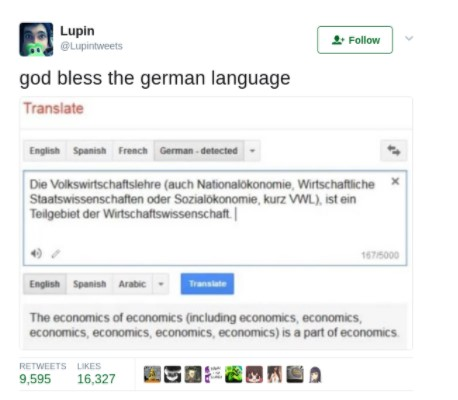

In [15]:
## Hình minh họa Image(fig1, height, width)

The German text uses words like `Nationalökonomie` and `Wirtschaftswissenschaft` but the English text simply says the economics of economics (including economics, economics and so forth) is part of economics. 

The German text has many different words related to economics and they are all simply closest to the english vector for economics, leading to a hilarious but woefully inaccurate translation.
#### Sentiment analysis
`Sentiment analysis` is far from a solved problem. 

Complex issues like snark or sarcasm, and difficult problems with negation (for example: I liked it BUT it could have been better) make it an open field of research. There is also active research regarding how separate communities use the same words differently. 

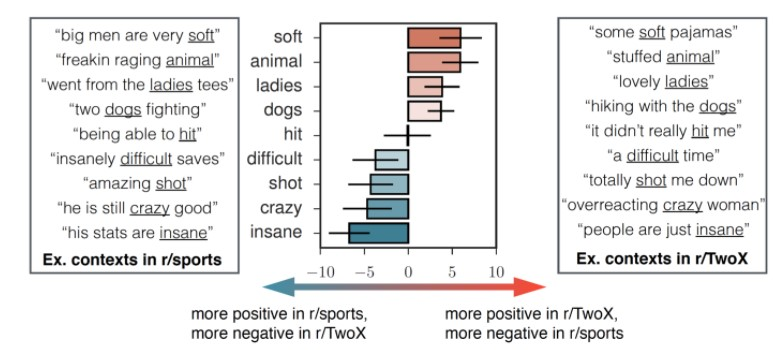

In [16]:
## Hình minh họa Image(fig1, height, width)

This is a graphic from a project called Social Sent created by a group of researchers at Stanford. The project compares sentiment changes in words over time and from different communities. 

Here, the authors compare sentiment in word usage between two different reddit communities, 2X which is a woman-centered reddit and sports. The graphic illustrates the SAME word can be used with very different sentiments depending on the communal understanding of the word.
#### Language biases
Finally, we must remember language can contain its own prejudices and unfair treatment towards groups. When we then train word vectors on these prejudiced texts, our word vectors will likely reflect those problems. 

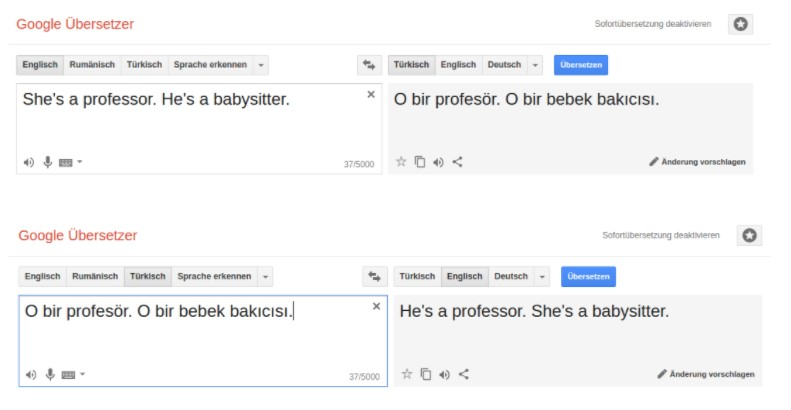

In [17]:
## Hình minh họa Image(fig1, height, width)

Here, we take a gendered language, like english and translate it to Turkish, a language with no gendered pronouns. 

When we click to translate it back, we see the genders have switched. This phenomena was studied in a recent article by a Princeton researcher Aylin Caliskan alongside several ethical machine learning researchers. She also gave a talk at the 33rd annual Chaos Computer Club conference in Hamburg, which I can definitely recommend viewing.

### 4.2. PRACTICES
#### Exercise 4.2.1. Improving the model
What are possible next steps you could take to improve the model?
#### Answers:
>- Tweaking alpha levels.
>- Trying a new classification model.
>- Training on a larger dataset.
>- Improving text preprocessing.

#### Exercise 4.2.2. Improving your model
Your job in this exercise is to test a few different alpha levels using the Tfidf vectors to determine if there is a better performing combination.

The training and test sets have been created, and `tfidf_vectorizer`, `tfidf_train`, and `tfidf_test` have been computed.
#### SOLUTION

In [18]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha = alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8833094213295074

Alpha:  0.1
Score:  0.9043519846963175

Alpha:  0.2
Score:  0.8928742228598756

Alpha:  0.30000000000000004
Score:  0.8847441415590627

Alpha:  0.4


/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.8775705404112865

Alpha:  0.5
Score:  0.8703969392635102

Alpha:  0.6000000000000001
Score:  0.8627450980392157

Alpha:  0.7000000000000001
Score:  0.8546150167384027

Alpha:  0.8
Score:  0.8488761358201817

Alpha:  0.9
Score:  0.8431372549019608



#### Exercise 4.2.3. Inspecting your model
Now that you have built a "fake news" classifier, you'll investigate what it has learned. You can map the important vector weights back to actual words using some simple inspection techniques.

You have your well performing tfidf Naive Bayes classifier available as nb_classifier, and the vectors as tfidf_vectorizer.
#### SOLUTION

In [19]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.320548729091426, '000035'), (-11.320548729091426, '0011'), (-11.320548729091426, '005'), (-11.320548729091426, '005s'), (-11.320548729091426, '006s'), (-11.320548729091426, '007'), (-11.320548729091426, '007s'), (-11.320548729091426, '008s'), (-11.320548729091426, '00am'), (-11.320548729091426, '00pm'), (-11.320548729091426, '015'), (-11.320548729091426, '01am'), (-11.320548729091426, '02714'), (-11.320548729091426, '02870'), (-11.320548729091426, '02welcome'), (-11.320548729091426, '031'), (-11.320548729091426, '0325'), (-11.320548729091426, '033'), (-11.320548729091426, '03747'), (-11.320548729091426, '039')]
REAL [(-7.737785530293221, 'rubio'), (-7.7335184395267405, 'gop'), (-7.699070234073627, 'voters'), (-7.657713496271492, 'bush'), (-7.635480121110196, 'house'), (-7.629299632750847, 'republicans'), (-7.57452273428647, 'percent'), (-7.538728559126163, 'new'), (-7.524719228835054, 'people'), (-7.455275973571226, 'party'), (-7.409161402371971, 'state'), (-7.35673875256050